In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 0\. Regras de associação

As regras de associação permitem que elementos em um conjunto de dados sejam expressos como 𝑋→𝑌, e lê-se 𝑋 implica em 𝑌, desde que 𝑋 e 𝑌 sejam sub-conjuntos da base de dados em questão e os conjuntos de itens não tenham intereceptação entre si 𝑋∩𝑌.

Como exemplo, {𝑙𝑒𝑖𝑡𝑒,𝑝ã𝑜}→{𝑜𝑣𝑜𝑠} é uma associação que diz que quando se encontra os itens 𝑙𝑒𝑖𝑡𝑒 e 𝑝ã𝑜 em uma ocorrência, é esperado que o 𝑜𝑣𝑜𝑠 também apareça na transação.

* Uma demonstração com dados reais do censo americano.




> **Nota:** Censo é um conjunto das operações que consistem em recolher, agrupar e publicar dados demográficos, econômicos e sociais relativos a um momento determinado ou em certos períodos, a todos os habitantes de um país ou território.



In [28]:
census = pd.read_csv('census.csv')
census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


* Distribuição da frequencia de idade

In [29]:
census['age'] = pd.cut(census['age'], bins=[0, 17, 25, 50, 90], labels=['faixa1', 'faixa2', 'faixa3', 'faixa4'])

In [30]:
census.head(n=1)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,faixa3,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


* Separação de dados em formato string para associação

In [31]:
census_apriori = census[['age','workclass','education','marital-status','relationship','occupation','sex','native-country','income']]

* Extração de amostragem simples

In [32]:
census_apriori = census_apriori.sample(n=1000)
census_apriori.shape

(1000, 9)

* Listando cada linha para aplicar a associação

In [33]:
transacoes = list()
for i in range(census_apriori.shape[0]):
  transacoes.append([str(census_apriori.values[i,j]) for j in range(census_apriori.shape[1])])

In [34]:
transacoes[:2]

[['faixa3',
  ' Self-emp-not-inc',
  ' HS-grad',
  ' Married-civ-spouse',
  ' Husband',
  ' Sales',
  ' Male',
  ' Jamaica',
  ' <=50K'],
 ['faixa3',
  ' Private',
  ' HS-grad',
  ' Never-married',
  ' Not-in-family',
  ' Exec-managerial',
  ' Female',
  ' United-States',
  ' <=50K']]



> biblioteca para aplicação da regra de associaçao apriori



In [35]:
!pip install apyori

In [36]:
from apyori import apriori

In [37]:
regras = apriori(transacoes, min_support= 0.3, min_confidence=0.2)
resultado = list(regras)

* frequencia apriori aplicada

In [38]:
resultado[40]

RelationRecord(items=frozenset({' United-States', 'faixa3', ' Male'}), support=0.368, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' United-States', 'faixa3', ' Male'}), confidence=0.368, lift=1.0), OrderedStatistic(items_base=frozenset({' Male'}), items_add=frozenset({' United-States', 'faixa3'}), confidence=0.5411764705882353, lift=1.026900323696841), OrderedStatistic(items_base=frozenset({' United-States'}), items_add=frozenset({'faixa3', ' Male'}), confidence=0.4061810154525386, lift=0.9834891415315705), OrderedStatistic(items_base=frozenset({'faixa3'}), items_add=frozenset({' United-States', ' Male'}), confidence=0.6237288135593221, lift=1.0141931927793855), OrderedStatistic(items_base=frozenset({' United-States', ' Male'}), items_add=frozenset({'faixa3'}), confidence=0.5983739837398374, lift=1.0141931927793855), OrderedStatistic(items_base=frozenset({'faixa3', ' Male'}), items_add=frozenset({' United-States'}), confidence=0.891041162227603, li



> Support de 0.30% no dataset onde na presença de Homens(Male) são americanos (United-States) na idade de Faixa 3 (25 - 50anos)

* if ( Male), ( United-States, faixa3), confidence=0.5411764705882353

* if ( United-States), ( faixa3, Male), confidence=0.4061810154525386

* if ( faixa3), ( United-States, Male), confidence=0.6237288135593221



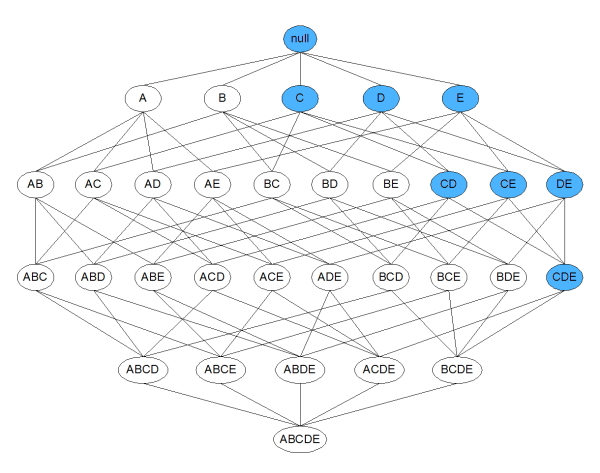